# Clasificación Básica: Predecir una imagen de moda

Esta Guia entrena un modelo de red neuronal para clasificar imagenes de ropa como, tennis y camisetas.

Esta Guia usa [tf.keras](https://www.tensorflow.org/guide/keras), un API de alto nivel para construir y entrenar modelos en Tensorflow.

## Importar el set de datos de moda de MNIST

Esta guia usa el set de datos de [Fashion MNIST](https://github.com/zalandoresearch/fashion-mnist)
que contiene mas de 70,000 imagenes en 10 categorias. Las imagenes muestran articulos individuales de ropa a una resolucion baja (28 por 28 pixeles) como se ve aca:

<table>
  <tr><td>
    <img src="https://tensorflow.org/images/fashion-mnist-sprite.png"
         alt="Fashion MNIST sprite"  width="600">
  </td></tr>
  <tr><td align="center">
    <b>Figure 1.</b> <a href="https://github.com/zalandoresearch/fashion-mnist">Fashion-MNIST samples</a> (by Zalando, MIT License).<br/>&nbsp;
  </td></tr>
</table>

Para importar y cargar el set de datos de MNIST directamente de TensorFlow:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow import keras

In [2]:
fashion_mnist = keras.datasets.fashion_mnist


In [3]:
fashion_mnist.load_data()

((array([[[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         ...,
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0

In [22]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


La *class* de ropa que la imagen representa.

<table>
  <tr>
    <th>Label</th>
    <th>Class</th>
  </tr>
  <tr>
    <td>0</td>
    <td>T-shirt/top</td>
  </tr>
  <tr>
    <td>1</td>
    <td>Trouser</td>
  </tr>
    <tr>
    <td>2</td>
    <td>Pullover</td>
  </tr>
    <tr>
    <td>3</td>
    <td>Dress</td>
  </tr>
    <tr>
    <td>4</td>
    <td>Coat</td>
  </tr>
    <tr>
    <td>5</td>
    <td>Sandal</td>
  </tr>
    <tr>
    <td>6</td>
    <td>Shirt</td>
  </tr>
    <tr>
    <td>7</td>
    <td>Sneaker</td>
  </tr>
    <tr>
    <td>8</td>
    <td>Bag</td>
  </tr>
    <tr>
    <td>9</td>
    <td>Ankle boot</td>
  </tr>
</table>

Cada imagen es mapeada a una unica etiqueta. Ya que los *Class names* no estan incluidos en el dataset. Los guardamos en la siguiente lista:

In [6]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
len(class_names)

10

In [7]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [8]:
y_test

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

## Explore el set de datos

* ¿Cuántas imágenes hay en train?
* ¿Y en test?
* ¿De cuántos pixels se compone cada imagen?
* ¿Cuáles son los valores de los labels?

In [23]:
X_train.shape[0]

60000

In [24]:
X_test.shape[0]

10000

In [12]:
X_train.shape[1] * X_train.shape[2] 

784

In [14]:
X_train[0].size

784

In [17]:
pd.Series(y_train).value_counts()

9    6000
0    6000
3    6000
2    6000
7    6000
5    6000
1    6000
6    6000
4    6000
8    6000
dtype: int64

## Pre-procese el set de datos

Inspecciona y representa la primera imagen del dataset de train. Para ello, utiliza la función `imshow` de matplotlib.

In [25]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

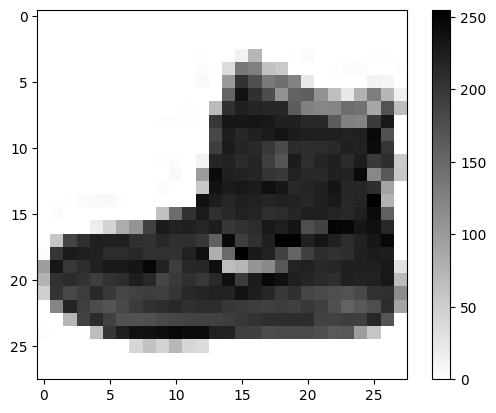

In [28]:
plt.imshow(X_train[0], cmap='binary')
plt.colorbar()

Escala los conjuntos de train y test para que vayan del 0 al 1. No hace falta usar ninguna librería. Con realizar una división en cada conjunto será suficiente.

In [30]:
X_train.min()

0

In [29]:
X_train.max()

255

In [31]:
X_train = X_train/255
X_test = X_test/255

In [32]:
X_train.min()

0.0

In [33]:
X_train.max()

1.0

Para verificar que el set de datos está en el formato adecuado y que están listos para construir y entrenar la red, vamos a desplegar las primeras 25 imágenes del *training set* y despleguemos el nombre de cada clase debajo de cada imagen.

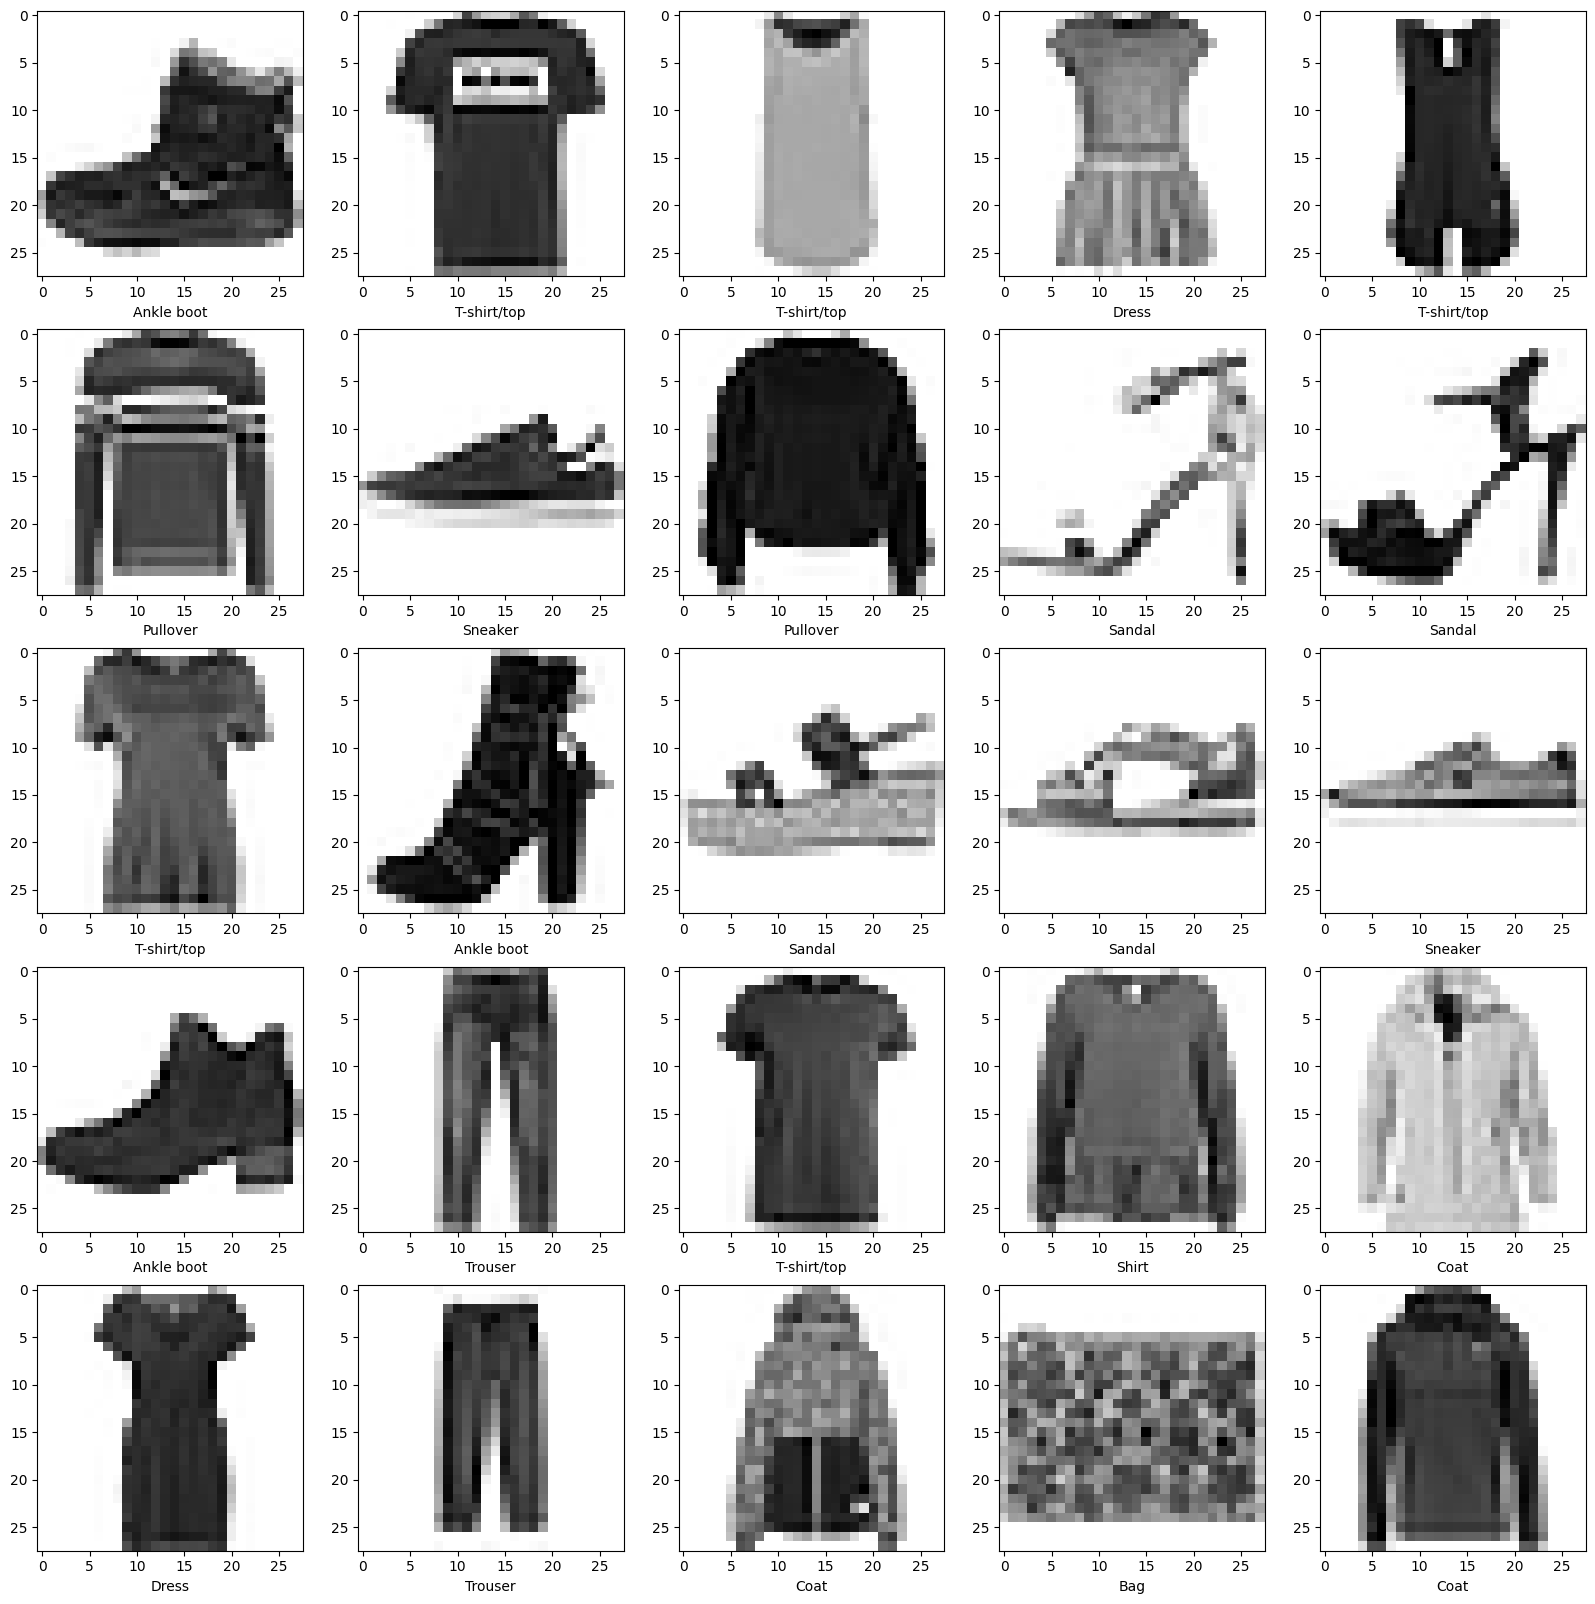

In [36]:
plt.figure(figsize=(20,20))
for i in range(25):
    plt.subplot(5,5, i+1)
    plt.imshow(X_train[i], cmap="binary")
    plt.xlabel(class_names[y_train[i]])

## Construir el Modelo

Construir la red neuronal requiere configurar las capas del modelo y luego compilar el modelo.

### Configurar las Capas
Construye todas las capas del modelo.

In [39]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128),
    keras.layers.Dense(32),
    keras.layers.Dense(10, activation="softmax")
])

### Compila el modelo

Antes de que el modelo este listo para entrenar , se necesitan algunas configuraciones más. Estas son agregadas durante el paso de compilacion del modelo:

* *Loss function* —Esto mide que tan exacto es el modelo durante el entrenamiento. Quiere minimizar esta función para dirigir el modelo en la dirección adecuada.
* *Optimizer* — Esto es cómo el modelo aprende basado en el set de datos que ve y la función de pérdida.
* *Metrics* — Se usan para monitorear los pasos de entrenamiento y de pruebas.


Como es un problema de clasificación multiclase, tendrás que usar `sparse_categorical_crossentropy` como función de coste. En cuanto a las métricas, usa simplemente `accuracy`.

In [54]:
model.compile(
    optimizer = 'sgd',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

In [55]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_4 (Dense)             (None, 128)               100480    
                                                                 
 dense_5 (Dense)             (None, 32)                4128      
                                                                 
 dense_6 (Dense)             (None, 10)                330       
                                                                 
Total params: 104938 (409.91 KB)
Trainable params: 104938 (409.91 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [44]:
784 * 128 + 128

100480

In [46]:
128 * 32 + 32

4128

## Entrenar el Modelo
Empieza entrenándolo con 10 epochs. Prueba con más

In [56]:
len(X_train)*0.9/32

1687.5

In [50]:
history = model.fit(
    X_train,
    y_train,
    epochs = 10, 
    validation_split=0.1
)

Epoch 1/10


1688/1688 [==============================] - 9s 4ms/step - loss: 0.6680 - accuracy: 0.7731 - val_loss: 0.5197 - val_accuracy: 0.8158
Epoch 2/10
1688/1688 [==============================] - 7s 4ms/step - loss: 0.4921 - accuracy: 0.8301 - val_loss: 0.4660 - val_accuracy: 0.8315
Epoch 3/10
1688/1688 [==============================] - 8s 4ms/step - loss: 0.4620 - accuracy: 0.8396 - val_loss: 0.4472 - val_accuracy: 0.8420
Epoch 4/10
1688/1688 [==============================] - 8s 5ms/step - loss: 0.4456 - accuracy: 0.8444 - val_loss: 0.4501 - val_accuracy: 0.8393
Epoch 5/10
1688/1688 [==============================] - 7s 4ms/step - loss: 0.4358 - accuracy: 0.8486 - val_loss: 0.4499 - val_accuracy: 0.8417
Epoch 6/10
1688/1688 [==============================] - 7s 4ms/step - loss: 0.4289 - accuracy: 0.8518 - val_loss: 0.4880 - val_accuracy: 0.8277
Epoch 7/10
1688/1688 [==============================] - 8s 5ms/step - loss: 0.4241 - accuracy: 0.8517 - val_loss: 0.4294 - val_accurac

<Axes: >

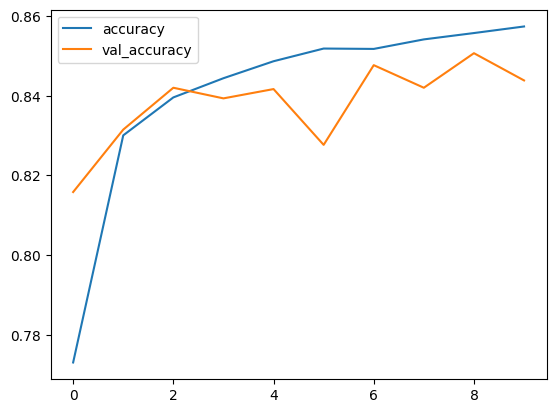

In [51]:
pd.DataFrame(history.history)[['accuracy', 'val_accuracy']].plot()

In [57]:
model_2 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(256),
    keras.layers.Dense(64),
    keras.layers.Dense(32),
    keras.layers.Dense(10, activation="softmax")
])
model_2.compile(
    optimizer = 'sgd',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

In [58]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_7 (Dense)             (None, 256)               200960    
                                                                 
 dense_8 (Dense)             (None, 64)                16448     
                                                                 
 dense_9 (Dense)             (None, 32)                2080      
                                                                 
 dense_10 (Dense)            (None, 10)                330       
                                                                 
Total params: 219818 (858.66 KB)
Trainable params: 219818 (858.66 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [59]:
early_stopping = keras.callbacks.EarlyStopping(patience=5)

In [61]:
history = model_2.fit(
    X_train,
    y_train,
    epochs = 50, 
    validation_split=0.1,
    callbacks = [early_stopping]
)

Epoch 1/50
1688/1688 [==============================] - 10s 5ms/step - loss: 0.6266 - accuracy: 0.7846 - val_loss: 0.4890 - val_accuracy: 0.8307
Epoch 2/50
1688/1688 [==============================] - 9s 5ms/step - loss: 0.4793 - accuracy: 0.8326 - val_loss: 0.4679 - val_accuracy: 0.8332
Epoch 3/50
1688/1688 [==============================] - 8s 4ms/step - loss: 0.4536 - accuracy: 0.8420 - val_loss: 0.4616 - val_accuracy: 0.8412
Epoch 4/50
1688/1688 [==============================] - 7s 4ms/step - loss: 0.4414 - accuracy: 0.8464 - val_loss: 0.4429 - val_accuracy: 0.8428
Epoch 5/50
1688/1688 [==============================] - 7s 4ms/step - loss: 0.4306 - accuracy: 0.8494 - val_loss: 0.4565 - val_accuracy: 0.8328
Epoch 6/50
1688/1688 [==============================] - 7s 4ms/step - loss: 0.4256 - accuracy: 0.8516 - val_loss: 0.4871 - val_accuracy: 0.8328
Epoch 7/50
1688/1688 [==============================] - 8s 5ms/step - loss: 0.4190 - accuracy: 0.8535 - val_loss: 0.4247 - val_accuracy

<Axes: >

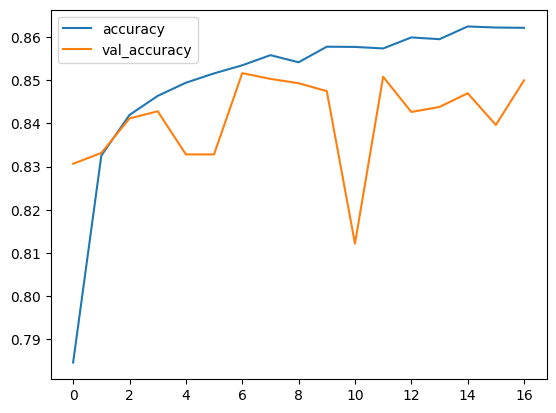

In [62]:
pd.DataFrame(history.history)[['accuracy', 'val_accuracy']].plot()

## Evaluar Accuracy
Prueba el rendimiento del modelo con los datos de test

In [68]:
len(X_test)/32

312.5

In [52]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.4832 - accuracy: 0.8277


[0.48321929574012756, 0.8277000188827515]

In [64]:
model_2.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.4530 - accuracy: 0.8412


[0.45295843482017517, 0.8411999940872192]

## Hacer predicciones

Con el modelo entrenado puedes usarlo para hacer predicciones sobre imagenes.

In [72]:
y_pred = model.predict(X_test)
y_pred

313/313 [==============================] - 1s 2ms/step


array([[4.7054701e-07, 4.0505768e-08, 4.8109173e-06, ..., 3.4439754e-02,
        1.2841668e-03, 9.0196157e-01],
       [5.9327565e-05, 1.6359330e-07, 8.4931952e-01, ..., 1.9825829e-13,
        7.9957899e-06, 1.0931505e-12],
       [1.6727719e-05, 9.9991822e-01, 6.7351884e-06, ..., 1.7189919e-09,
        4.8242903e-08, 3.8200589e-11],
       ...,
       [8.2649380e-02, 1.1637682e-06, 2.8997050e-03, ..., 9.2583141e-05,
        5.8244073e-01, 1.2686114e-06],
       [7.7704550e-07, 9.9985814e-01, 1.5599079e-06, ..., 1.5043172e-07,
        1.5300868e-08, 2.9800225e-07],
       [4.0716535e-05, 1.2886799e-05, 2.8908174e-04, ..., 1.2736598e-02,
        2.5644163e-03, 1.0144754e-03]], dtype=float32)

In [77]:
y_pred_labels = np.argmax(y_pred, axis=1)
y_pred_labels

array([9, 2, 1, ..., 8, 1, 5], dtype=int64)

El modelo ha predecido la etiqueta para cada imagen en el set de datos de *test* (prueba). Miremos la primera prediccion:

In [78]:
y_pred[0]

array([4.7054701e-07, 4.0505768e-08, 4.8109173e-06, 1.9899767e-06,
       7.5037078e-06, 6.2285695e-02, 1.4103347e-05, 3.4439754e-02,
       1.2841668e-03, 9.0196157e-01], dtype=float32)

In [79]:
y_pred_labels[0]

9

In [80]:
class_names[y_pred_labels[0]]

'Ankle boot'

*Una* prediccion es un array de 10 numeros. Estos representan el nivel de "confianza" del modelo sobre las imagenes de cada uno de los 10 articulos de moda/ropa. Puedes revisar cual tiene el nivel mas alto de confianza:

In [81]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

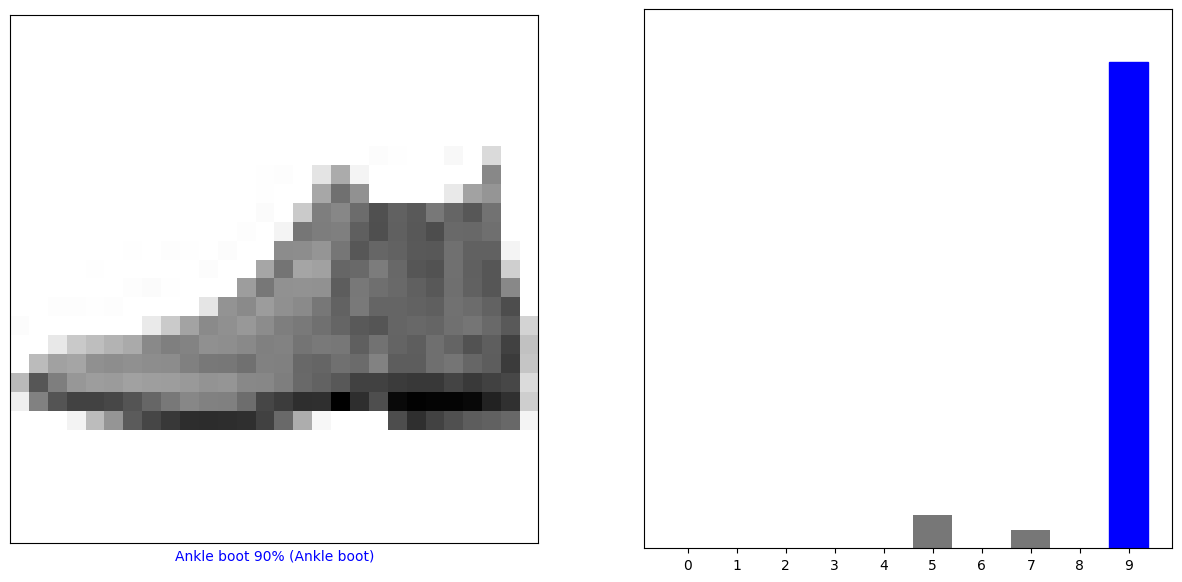

In [84]:
i = 0
plt.figure(figsize=(15,7))
plt.subplot(1,2,1)
plot_image(i, y_pred[i], y_test, X_test)
plt.subplot(1,2,2)
plot_value_array(i, y_pred[i], y_test)

Entonces, el modelo tiene mayor confianza que esta imagen es un bota de tobillo "ankle boot" o `class_names[9]`. Examinando las etiquetas de *test* o de pruebas muestra que esta clasificación es correcta:

**Grafica** esto para poder ver todo el set de la prediccion de las 10 clases.

Miremos la imagen [0], sus predicciones y el array de predicciones. Las etiquetas de predicción correctas estan en azul y las incorrectas están en rojo. El número entrega el porcentaje (sobre 100) para la etiqueta predecida.

Vamos a graficar multiples imagenes con sus predicciones. Notese que el modelo puede estar equivocado aun cuando tiene mucha confianza.

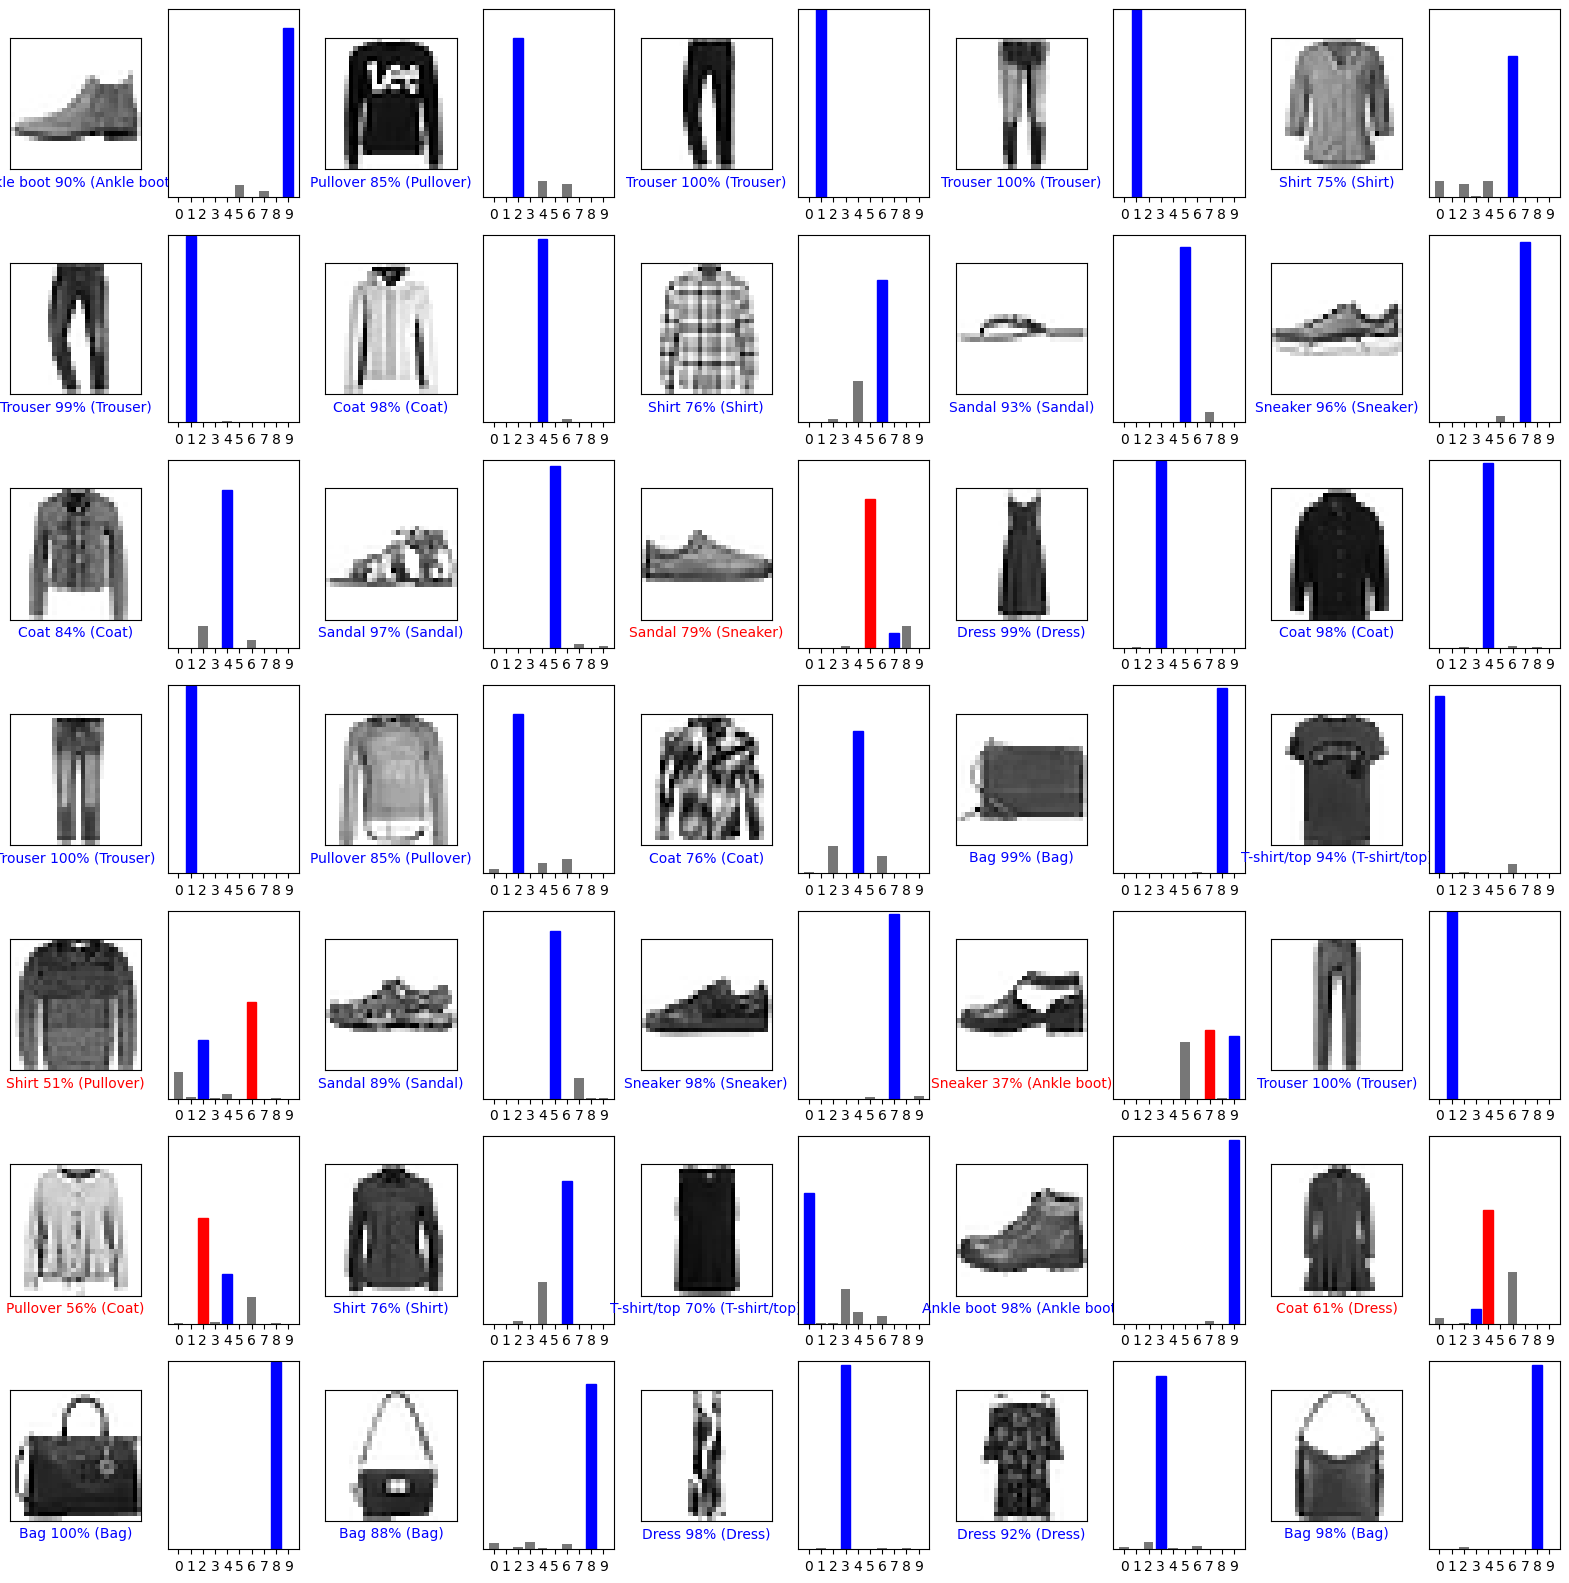

In [86]:
n_rows = 7
n_cols = 5
n_im = n_rows * n_cols

plt.figure(figsize=(20,20))

for i in range(n_im):
    plt.subplot(n_rows, n_cols*2, 2*i + 1)
    plot_image(i, y_pred[i], y_test, X_test)
    plt.subplot(n_rows, n_cols*2, 2*i + 2)
    plot_value_array(i, y_pred[i], y_test)

Evalúa tu modelo con una matriz de confusión e interprétala.

<Axes: >

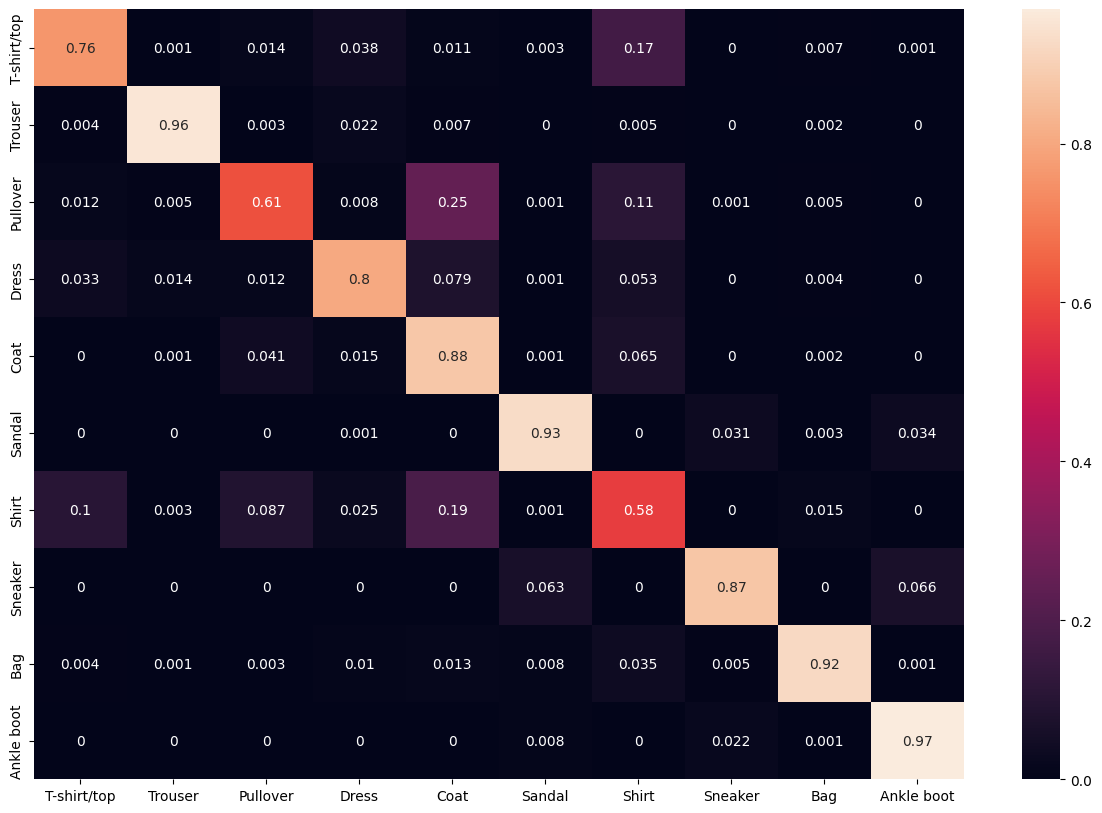

In [88]:
from sklearn.metrics import confusion_matrix

c_mat = confusion_matrix(y_test, y_pred_labels, normalize='true')
plt.figure(figsize=(15,10))
sns.heatmap(c_mat, annot=True, xticklabels=class_names, yticklabels=class_names)

Finalmente, usamos el modelo entrenado para hacer una prediccion sobre una única imagen.

In [89]:
class_names[np.argmax(model_2.predict(X_test[112:113]))]

1/1 [==============================] - 0s 185ms/step


'Sneaker'